In [14]:
%load_ext autoreload
%autoreload 2

from data_loading.loo_data_loader import DesignatedDataLoader
data_loader = DesignatedDataLoader.load_from(
    path='../data_loading/mindreader',
    movies_only=False,
    min_num_entity_ratings=3,
    filter_unknowns=True
)

data_loader.random_seed = 12

print(data_loader.info())

train, validation, test = data_loader.make(
    movie_to_entity_ratio=1,
    n_negative_samples=100
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Init dataloader with 36349 ratings
 
            DataLoader Information
            -----------------------------------
            n_users:                      929
            n_movies:                     1456
            n_descriptive_entities:       731

            n_ratings:                    36349
            n_movie_ratings:              15605
            n_descriptive_entity_ratings: 20744
        
Asserting positive samples not in training set for each user...
Asserting negative samples occurrence in training set, but not rated for each user...
Asserting positive samples do not occur in negative samples...
Returning a dataset over 927 users.


In [15]:
import matplotlib.pyplot as plt

from models.pagerank.collaborative_pagerank_recommender import CollaborativePageRankRecommender
collab = CollaborativePageRankRecommender()
hit_rates = collab.fit(train, validation)

2019-12-18 14:46:47.518 | INFO     | models.pagerank.pagerank_recommender:fit:70 - Trying alpha value 0.1
100%|██████████| 927/927 [00:39<00:00, 23.75it/s]
2019-12-18 14:47:26.557 | INFO     | models.pagerank.pagerank_recommender:fit:88 - Hit ratio of 0.1: 0.38727076591154264
2019-12-18 14:47:26.557 | INFO     | models.pagerank.pagerank_recommender:fit:70 - Trying alpha value 0.2
100%|██████████| 927/927 [00:39<00:00, 23.43it/s]
2019-12-18 14:48:06.129 | INFO     | models.pagerank.pagerank_recommender:fit:88 - Hit ratio of 0.2: 0.39050701186623515
2019-12-18 14:48:06.130 | INFO     | models.pagerank.pagerank_recommender:fit:70 - Trying alpha value 0.30000000000000004
100%|██████████| 927/927 [00:39<00:00, 23.64it/s]
2019-12-18 14:48:45.348 | INFO     | models.pagerank.pagerank_recommender:fit:88 - Hit ratio of 0.30000000000000004: 0.39158576051779936
2019-12-18 14:48:45.349 | INFO     | models.pagerank.pagerank_recommender:fit:70 - Trying alpha value 0.4
100%|██████████| 927/927 [00:37

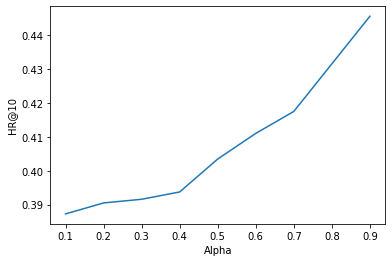

In [16]:
def plot_hit_rates(rates):
    plt.plot(list(rates.keys()), list(rates.values()))
    plt.xlabel('Alpha')
    plt.ylabel('HR@10')
    plt.savefig('hit_rates_all.pdf')
    plt.show()
    
plot_hit_rates(hit_rates)
